In [15]:
import sys; sys.path.append('../'); from wwa import *

Xn, Xx, Yn, Yx = [-86,-57,-11,17] # larger area for spatial patterns etc
xn, xx, yn, yx = [-80,-66,-3,13]

cproj = cartopy.crs.PlateCarree()

# **Physical geography**

In [16]:
elev = xr.open_dataset("data/gebco_2023_n16.2598_s-10.7227_w-85.7812_e-57.2168.nc").elevation

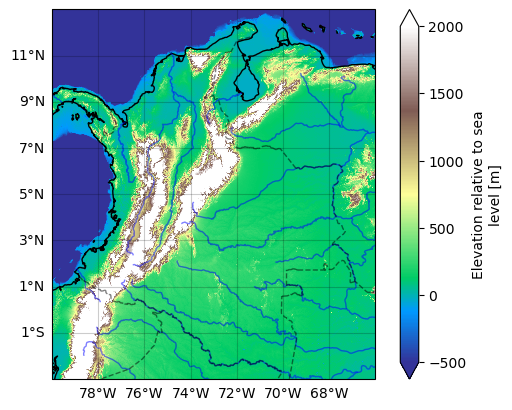

In [17]:
elev.sel(lon = slice(xn,xx), lat = slice(yn,yx)).plot(cmap = "terrain", vmax = 2000, vmin = -500, subplot_kws = {"projection" : cproj, "extent" : (xn, xx, yn, yx)})
ax = plt.gca()
ax.coastlines()
ax.add_feature(cartopy.feature.RIVERS, color = "blue", alpha = 0.5)
ax.add_feature(cartopy.feature.BORDERS, color = "k", alpha = 0.5, ls = "--")

ax.gridlines(color = "k", alpha = 0.2, draw_labels = ["left", "bottom"], xlocs = range(xn,xx,2), ylocs = range(yn,yx,2))

# **MODIS active fire data**

In [18]:
df = pd.concat([pd.read_csv(fnm) for fnm in glob.glob("data/*M-C61*.csv")])

# add year & month as columns for easier filtering
df["y"] = [int(d[:4]) for d in df.acq_date]
df["m"] = [int(d[5:7]) for d in df.acq_date]

# filter out low-confidence points
df = df.loc[df.confidence >= 90]

# convert to geodataframe (standard lat-lon coords)
df = gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(x=df.longitude, y=df.latitude), crs = "EPSG:4326")

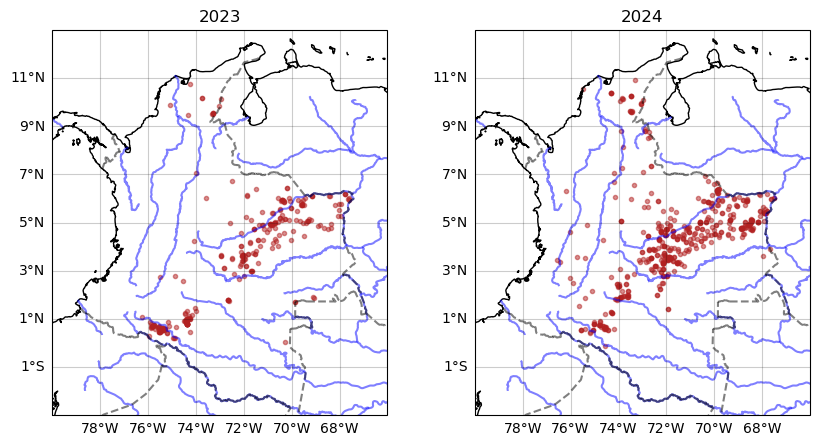

In [25]:
fig, axs = plt.subplots(ncols = 2, figsize = (10,5), dpi = 100, subplot_kw = {"projection" : cproj, "extent" : (xn, xx, yn, yx)})

for i in range(2):
    ax = axs[i]
    y = range(2023,2025)[i]
    df.loc[(df.y == y) & (df.m == 1)].plot(ax = ax, marker = ".", color = "firebrick", alpha = 0.5)
    ax.set_title(str(y))

for ax in axs:
    ax.coastlines()
    ax.add_feature(cartopy.feature.RIVERS, color = "blue", alpha = 0.5, lw = 1.5)
    ax.add_feature(cartopy.feature.BORDERS, color = "k", alpha = 0.5, ls = "--", lw = 1.5)
    ax.gridlines(color = "k", alpha = 0.2, draw_labels = ["left", "bottom"], xlocs = range(xn,xx,2), ylocs = range(yn,yx,2))

---
# **MSWX time series**